In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
os.chdir("C:/Users/chakr/Desktop/GA_Datasets")

In [10]:
df= pd.read_json("train_data.json")

In [11]:
#Extrapolating features from the "Time of Day" column
df=df.T

In [12]:
df["times_only"]=df["tod"].apply(lambda x: [i.rsplit(":")[0] for i in x.rsplit(",")])
df["Morning_Views"]= df["times_only"].apply(lambda x:sum([1 for i in x if int(i)<12]))
df["Afternoon_Views"]= df["times_only"].apply(lambda x:sum([1 for i in x if int(i)>=12 and int(i)<17]))
df["Evening_Views"]= df["times_only"].apply(lambda x:sum([1 for i in x if int(i)>=17 and int(i)<20]))
df["Night_Views"]=df["times_only"].apply(lambda x:sum([1 for i in x if int(i)>=20 and int(i)<=24]))
df["Total_Views"]= df["times_only"].apply(lambda x:len(x))

In [13]:
df.head()

,cities,dow,genres,segment,titles,tod,times_only,Morning_Views,Afternoon_Views,Evening_Views,Night_Views,Total_Views
train-121672,"delhi:3492,mumbai:64","5:482,4:3008,7:64","Drama:6,Cricket:3469,Wildlife:79",neg,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","18:1372,21:1862,17:320","[18, 21, 17]",0,0,2,1,3
train-121673,"ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,"Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...","[11, 10, 13, 12, 20, 21, 17, 16, 19, 18, 23, 2...",6,5,3,4,18
train-121670,navi mumbai:29400,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,"India vs Australia 1st Test Hindi:83,India vs ...","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...","[11, 10, 13, 12, 20, 14, 22, 23, 19, 18, 8, 7,...",6,4,2,4,16
train-121671,"chennai:77,navi mumbai:4005,mumbai:0","1:77,2:3883,5:122","Romance:77,Drama:122,Cricket:3883",neg,"Rangoon:77,India A vs England XI:3883,Kaabil:122","10:122,12:77,15:1800,14:0,16:2083","[10, 12, 15, 14, 16]",1,4,0,0,5
train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864","1:6150,3:2378",TalkShow:8529,pos,Koffee With Karan:8529,"20:529,21:1257,22:4930,23:538,19:1268,18:6","[20, 21, 22, 23, 19, 18]",0,0,2,4,6


<BarContainer object of 2 artists>

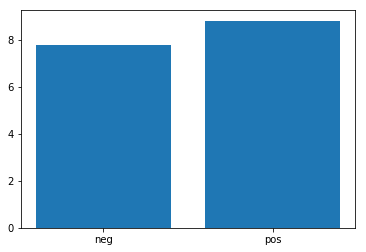

In [14]:
#Take the mean of the total views for the positive class and negative class
mean_segment= df.groupby( [ "segment"]).mean()
plt.bar(mean_segment.index,(mean_segment["Total_Views"]))

In [15]:
#Insight: The positive class seems to have a slightly higher number of total views than the negative class

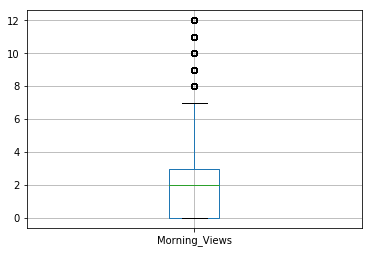

In [48]:
df.boxplot(column=['Morning_Views'])

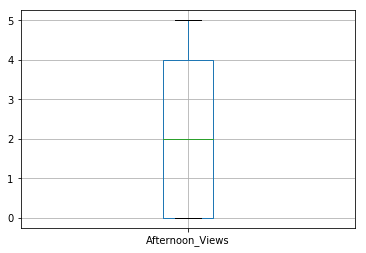

In [47]:
df.boxplot(column=['Afternoon_Views'])

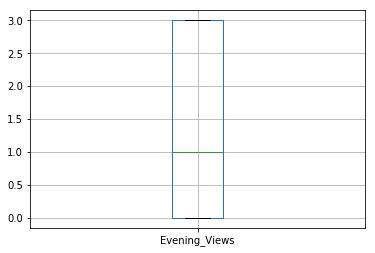

In [49]:
df.boxplot(column=['Evening_Views'])

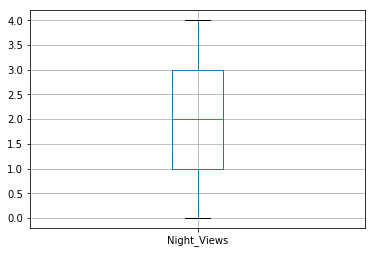

In [50]:
df.boxplot(column=['Night_Views'])

In [20]:
#Insight: There seems to be more variation between the morning and afternoon viewership of the positive and negative class
# The evening and night class seems to have roughly equal viewership between the positive and the negative class
#From this it would seem that morning and afternoon classes are better class predictors than evening and night
#Outcome of this exercise: 3 features selected- morning viewers, afternoon viewers and total viewers

In [21]:
#Feature engineering with cities

a=[]
for i in df['cities']:
    for j in (i.split(',')):
              a.append((j.split(':')[0])) 
            
a=set(a)
metro= ["mumbai","gurgaon","kolkata","delhi","chennai","bangalore","pune","hyderabad","new delhi","delhi","navi mumbai"]
Metros = []
for i in a:
    if i in metro:
        Metros.append(i)
Metros = set(Metros)

Non_Metros = a-Metros
Metros = list(Metros)

In [22]:
df["city_only"] = df["cities"].apply(lambda x: [i.rsplit(":")[0] for i in x.rsplit(",")])
df["metro"] = df["city_only"].apply(lambda x: sum([1 for i in x if i in Metros]))
df['Non_metro'] = df['city_only'].apply(lambda x: sum([1 for i in x if i not in Metros]))

<BarContainer object of 2 artists>

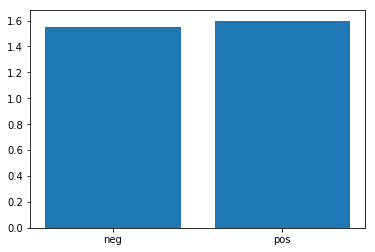

In [23]:
mean_segment=df.groupby( [ "segment"]).mean()
mean_segment
plt.bar(mean_segment.index,(mean_segment["metro"]))

<BarContainer object of 2 artists>

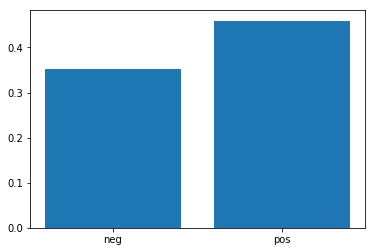

In [24]:
mean_segment=df.groupby( [ "segment"]).mean()
mean_segment
plt.bar(mean_segment.index,(mean_segment["Non_metro"]))

In [25]:
#Interestingly, the non metro category seems to be a stronger class predictor than the metro category.
#The negative class has a lower mean of no. metro cities that a user watches in, as compared to the positive class

In [26]:
df["Number_of_cities"]= df["city_only"].apply(lambda x:len(x))

<BarContainer object of 2 artists>

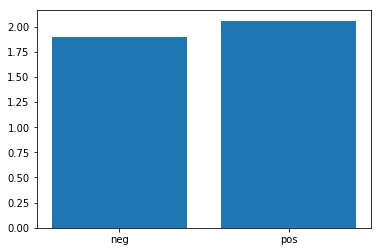

In [27]:
mean_segment=df.groupby( [ "segment"]).mean()
mean_segment
plt.bar(mean_segment.index,(mean_segment["Number_of_cities"]))

In [28]:
#Intuition here is that users that watch Hotstar shows in a greater number of cities may be more responsive to advertisements
#However not much difference between the classes here while taking the mean

In [29]:
#However, what happens if we look at users that watch in more than 5 or 10 cities? 
above_5_metro=df.loc[df["metro"]>5, ["segment"]]
above_5_metro["segment"].value_counts(normalize=True)

neg    0.886536
pos    0.113464
Name: segment, dtype: float64

In [30]:
above_10_metro=df.loc[df["metro"]>=10, ["segment"]]
above_10_metro["segment"].value_counts(normalize=True)

neg    0.75
pos    0.25
Name: segment, dtype: float64

In [31]:
#Intuition above is that at higher levels, a high number of cities per user can be an important class predictor

In [32]:
#Total time viewed as an indicator of likelihood of responding to advertisement
df["viewing_time_only"]=df["tod"].apply(lambda x: [i.split(":")[1] for i in x.split(",")])
df["Summed_time"]=df["viewing_time_only"].apply(lambda x: sum([int(i) for i in x ]))

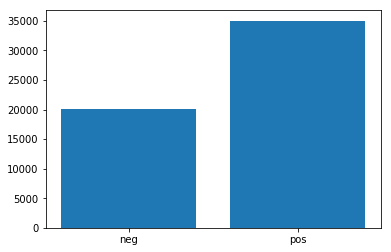

In [33]:
mean_segment= df.groupby( [ "segment"]).mean()
mean_segment
plt.bar(mean_segment.index,(mean_segment["Summed_time"]))
plt.show()

In [34]:
#Total viewing time seems to be an important class predictor- with the positive class having users with higher viewing times
#In other words the positive class have a higher mean watch time
#people who watch for more time are highly represented in positive class

In [35]:
df.head()

,cities,dow,genres,segment,titles,tod,times_only,Morning_Views,Afternoon_Views,Evening_Views,Night_Views,Total_Views,city_only,metro,Non_metro,Number_of_cities,viewing_time_only,Summed_time
train-121672,"delhi:3492,mumbai:64","5:482,4:3008,7:64","Drama:6,Cricket:3469,Wildlife:79",neg,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","18:1372,21:1862,17:320","[18, 21, 17]",0,0,2,1,3,"[delhi, mumbai]",2,0,2,"[1372, 1862, 320]",3554
train-121673,"ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,"Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...","[11, 10, 13, 12, 20, 21, 17, 16, 19, 18, 23, 2...",6,5,3,4,18,"[ahmedabad, mumbai]",1,1,2,"[7726, 3521, 2067, 3844, 4608, 9360, 5734, 443...",83635
train-121670,navi mumbai:29400,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,"India vs Australia 1st Test Hindi:83,India vs ...","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...","[11, 10, 13, 12, 20, 14, 22, 23, 19, 18, 8, 7,...",6,4,2,4,16,[navi mumbai],1,0,1,"[302, 1594, 331, 133, 3802, 3083, 2219, 2111, ...",29396
train-121671,"chennai:77,navi mumbai:4005,mumbai:0","1:77,2:3883,5:122","Romance:77,Drama:122,Cricket:3883",neg,"Rangoon:77,India A vs England XI:3883,Kaabil:122","10:122,12:77,15:1800,14:0,16:2083","[10, 12, 15, 14, 16]",1,4,0,0,5,"[chennai, navi mumbai, mumbai]",3,0,3,"[122, 77, 1800, 0, 2083]",4082
train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864","1:6150,3:2378",TalkShow:8529,pos,Koffee With Karan:8529,"20:529,21:1257,22:4930,23:538,19:1268,18:6","[20, 21, 22, 23, 19, 18]",0,0,2,4,6,"[bangalore, krishnarajapura, hosur]",1,2,3,"[529, 1257, 4930, 538, 1268, 6]",8528


In [36]:
q1= df.Summed_time.quantile(.25)
q3= df.Summed_time.quantile(.75)
iqr= q3-q1
# df['Summed_time']>df['Summed_time'].quantile(0.75)
df.describe()

,Morning_Views,Afternoon_Views,Evening_Views,Night_Views,Total_Views,metro,Non_metro,Number_of_cities,Summed_time
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05
mean,2.261065,2.189795,1.405280,1.996995,7.853135,1.551875,0.360650,1.912525,2.124487e+04
std,2.454590,1.868058,1.187019,1.477595,5.527403,1.073999,0.658106,1.229760,4.615646e+04
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00
25%,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.543000e+03
50%,2.000000,2.000000,1.000000,2.000000,7.000000,1.000000,0.000000,1.000000,6.742000e+03
75%,3.000000,4.000000,3.000000,3.000000,12.000000,2.000000,1.000000,2.000000,2.131000e+04
max,12.000000,5.000000,3.000000,4.000000,24.000000,10.000000,22.000000,22.000000,2.003932e+06


In [37]:
#Outlier analysis using the "Summed_time" column
df['segment'].loc[df['Summed_time']>(df['Summed_time'].quantile(0.75)-df['Summed_time'].quantile(0.25))*1.5+df['Summed_time'].quantile(0.75)].value_counts(normalize=True)

neg    0.860088
pos    0.139912
Name: segment, dtype: float64

In [38]:
#Total dataset split
df.segment.value_counts(normalize=True)

neg    0.923725
pos    0.076275
Name: segment, dtype: float64

In [39]:
outlier_subset=df['segment'].loc[df['Summed_time']>(df['Summed_time'].quantile(0.75)-df['Summed_time'].quantile(0.25))*1.5+df['Summed_time'].quantile(0.75)].value_counts(normalize=True)
whole_ds= df.segment.value_counts(normalize=True)

<BarContainer object of 2 artists>

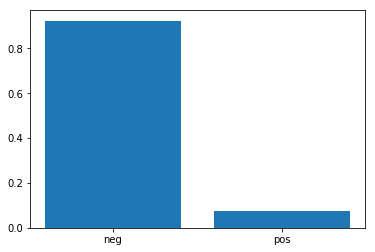

In [40]:
plt.bar(whole_ds.index,whole_ds)

<BarContainer object of 2 artists>

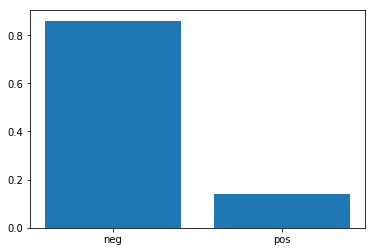

In [41]:
plt.bar(outlier_subset.index,outlier_subset)

In [42]:
df.head()

,cities,dow,genres,segment,titles,tod,times_only,Morning_Views,Afternoon_Views,Evening_Views,Night_Views,Total_Views,city_only,metro,Non_metro,Number_of_cities,viewing_time_only,Summed_time
train-121672,"delhi:3492,mumbai:64","5:482,4:3008,7:64","Drama:6,Cricket:3469,Wildlife:79",neg,"Wild Sex:79,Vintage Dhoni Comes Good with 134:...","18:1372,21:1862,17:320","[18, 21, 17]",0,0,2,1,3,"[delhi, mumbai]",2,0,2,"[1372, 1862, 320]",3554
train-121673,"ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,"Naamkarann:369,Ishq:59,Pardes Mein Hai Mera Di...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...","[11, 10, 13, 12, 20, 21, 17, 16, 19, 18, 23, 2...",6,5,3,4,18,"[ahmedabad, mumbai]",1,1,2,"[7726, 3521, 2067, 3844, 4608, 9360, 5734, 443...",83635
train-121670,navi mumbai:29400,"1:40,3:2700,2:4659,5:7338,4:6641,7:2218,6:5800","Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",neg,"India vs Australia 1st Test Hindi:83,India vs ...","11:302,10:1594,13:331,12:133,20:3802,14:3083,2...","[11, 10, 13, 12, 20, 14, 22, 23, 19, 18, 8, 7,...",6,4,2,4,16,[navi mumbai],1,0,1,"[302, 1594, 331, 133, 3802, 3083, 2219, 2111, ...",29396
train-121671,"chennai:77,navi mumbai:4005,mumbai:0","1:77,2:3883,5:122","Romance:77,Drama:122,Cricket:3883",neg,"Rangoon:77,India A vs England XI:3883,Kaabil:122","10:122,12:77,15:1800,14:0,16:2083","[10, 12, 15, 14, 16]",1,4,0,0,5,"[chennai, navi mumbai, mumbai]",3,0,3,"[122, 77, 1800, 0, 2083]",4082
train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864","1:6150,3:2378",TalkShow:8529,pos,Koffee With Karan:8529,"20:529,21:1257,22:4930,23:538,19:1268,18:6","[20, 21, 22, 23, 19, 18]",0,0,2,4,6,"[bangalore, krishnarajapura, hosur]",1,2,3,"[529, 1257, 4930, 538, 1268, 6]",8528


In [43]:
What about people who watch more titles?
Analyzing titles
df["titles"]=df["titles"].str.split(",")
df["titles_count"]=df["titles"].apply(lambda x:len(x))

SyntaxError: invalid syntax (<ipython-input-43-77f739a38043>, line 2)

In [ ]:
#Are people who watch more shows/movies highly represented in the positive class?
mean_segment= df.groupby( [ "segment"]).mean()
mean_segment
plt.bar(mean_segment.index,(mean_segment["titles_count"]))
plt.show()

In [ ]:
#Interestingly, people with a higher mean count of titles watched have a higher representation in the negative class.

In [ ]:
#Is there a relationship between the titles watched and the amount of time spent on Hotstar?
plt.scatter(df.titles_count,df.Summed_time)
plt.show()

In [ ]:
mean_segment["Afternoon_Views"]

In [ ]:
total_time_pos= df.loc[df["segment"]=="pos",["Summed_time"]]
total_time_neg= df.loc[df["segment"]=="neg",["Summed_time"]]


In [ ]:
total_time_pos.boxplot("Summed_time")
figure= plt.figure()
figure.suptitle("Total Time Viewed")
ax= figure.add_subplot(111)
ax.boxplot(total_time_pos)

ax= figure.add_subplot(121)
ax.boxplot(total_time_neg)
plt.show()

In [ ]:
total_time_neg.boxplot("Summed_time")

In [ ]:
total_time_pos= df.loc[df["segment"]=="pos",["Morning_Views"]]
morning_neg= df.loc[df["segment"]=="neg",["Morning_Views"]]

In [ ]:
total_time_pos= df.loc[df["segment"]=="pos",["Afternoon_Views"]]
total_time_pos= df.loc[df["segment"]=="neg",["Afternoon_Views"]]

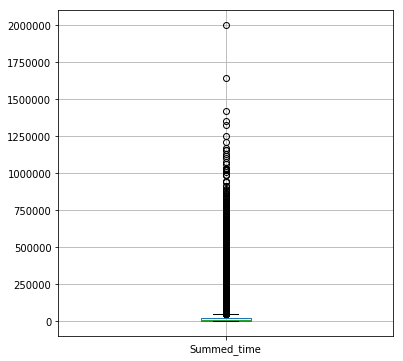

In [53]:
df.boxplot(column=['Summed_time'], figsize=(6,6))

In [55]:
df["titles"]=df["titles"].str.split(",")
df["titles_count"]=df["titles"].apply(lambda x:len(x))

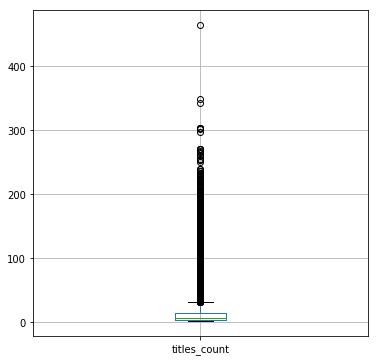

In [56]:
df.boxplot(column=['titles_count'], figsize=(6,6))

In [61]:
df['segment'].loc[df['titles_count']>(df['titles_count'].quantile(0.75)-df['titles_count'].quantile(0.25))*1.5+df['titles_count'].quantile(0.75)].value_counts(normalize=True)

neg    0.969028
pos    0.030972
Name: segment, dtype: float64

In [63]:
df.loc[df['titles_count']>(df['titles_count'].quantile(0.75)-df['titles_count'].quantile(0.25))*1.5+df['titles_count'].quantile(0.75)]

,cities,dow,genres,segment,titles,tod,times_only,Morning_Views,Afternoon_Views,Evening_Views,Night_Views,Total_Views,city_only,metro,Non_metro,Number_of_cities,viewing_time_only,Summed_time,titles_count
train-121673,"ahmedabad:56666,mumbai:26989","1:3257,3:9162,2:12893,5:9237,4:8503,7:25094,6:...","Drama:48949,Family:9927,Crime:1901,Romance:165...",neg,"[Naamkarann:369, Ishq:59, Pardes Mein Hai Mera...","11:7726,10:3521,13:2067,12:3844,20:4608,21:936...","[11, 10, 13, 12, 20, 21, 17, 16, 19, 18, 23, 2...",6,5,3,4,18,"[ahmedabad, mumbai]",1,1,2,"[7726, 3521, 2067, 3844, 4608, 9360, 5734, 443...",83635,33
train-123291,"pune:33,chennai:38097,navi mumbai:28054,mumbai...","1:6845,3:610,2:7529,5:14750,4:14103,7:8369,6:1...","Cricket:61889,Sport:1,TalkShow:1758,Crime:19,R...",neg,"[MI vs KKR:1623, India vs Bangladesh Day 2 Eng...","11:1976,10:7390,13:3332,12:145,15:5329,14:3853...","[11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 23, 2...",7,5,3,4,19,"[pune, chennai, navi mumbai, mumbai]",4,0,4,"[1976, 7390, 3332, 145, 5329, 3853, 4458, 4236...",68393,47
train-120987,"hyderabad:463,navi mumbai:3909,mumbai:87496,Un...","1:4415,3:16734,2:5636,5:12454,4:17628,7:32606,...","Drama:15786,TalkShow:55463,Cricket:45542,Comed...",neg,"[IPL celebrity spotting!:38, MI vs KKR:762, SR...","10:2009,13:2349,12:234,20:12239,21:21342,17:84...","[10, 13, 12, 20, 21, 17, 23, 19, 18, 16, 22, 1...",6,4,3,4,17,"[hyderabad, navi mumbai, mumbai, Unknown, delh...",5,2,7,"[2009, 2349, 234, 12239, 21342, 8428, 6242, 80...",116921,49
train-36129,"bangalore:6450,bengaluru:8440,kochi:3861,navi ...","1:2165,3:13275,2:3605,5:6719,4:4145,7:12932,6:...","Drama:13888,Action:3265,Cricket:30388,LiveTV:37",neg,"[India vs England | 2nd ODI | English:1461, In...","11:6194,10:3943,13:1687,12:5676,15:5224,14:252...","[11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 7, 8,...",5,5,3,2,15,"[bangalore, bengaluru, kochi, navi mumbai]",2,2,4,"[6194, 3943, 1687, 5676, 5224, 2524, 3178, 878...",47571,49
train-36124,Unknown:113070,"1:6296,3:3956,2:9366,5:6097,4:23160,7:64188","Action:1020,Drama:4900,Cricket:92425,Football:...",neg,"[Stoke 1-1 Manchester Utd:177, India vs Englan...","13:5125,15:11972,14:9996,22:9406,16:12662,19:1...","[13, 15, 14, 22, 16, 19, 18, 23, 0, 17, 20, 21]",1,4,3,4,12,[Unknown],0,1,1,"[5125, 11972, 9996, 9406, 12662, 11019, 8854, ...",113061,36
train-36122,"new delhi:14578,chennai:4830,Unknown:10776,del...","1:33552,3:43527,2:50177,5:35307,4:34148,7:4785...","Romance:83454,Cricket:4113,Family:86485,TalkSh...",pos,"[Pagal Nilavu:39862, Aus Turn the Tide to Humb...","11:35428,10:17657,13:20815,12:35514,15:28195,1...","[11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 23, 2...",5,5,3,3,16,"[new delhi, chennai, Unknown, delhi, kochi, ba...",4,2,6,"[35428, 17657, 20815, 35514, 28195, 26319, 510...",222378,31
train-112892,Unknown:28980,"1:4515,3:2462,2:5117,5:726,4:8344,7:315,6:7494","Drama:77,Cricket:28903",neg,"[Dhoni Quits Captaincy:54, Stars vs Sixers | H...","11:883,10:1509,13:5837,12:1006,15:3916,14:5189...","[11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 9]",3,5,3,0,11,[Unknown],0,1,1,"[883, 1509, 5837, 1006, 3916, 5189, 2226, 6152...",28972,44
train-29338,"kolkata:4087,prabhadevi:4248,delhi:7061,suri:1...","1:1,3:5087,2:166,5:7516,4:7803,7:14,6:6078","Action:25,Drama:27,Cricket:20911,Thriller:3010...",neg,"[MI vs KKR:12, SRH vs RCB:4599, KKR vs KXIP:33...","11:302,10:360,20:2427,21:2545,22:5309,23:5884,...","[11, 10, 20, 21, 22, 23, 19, 16, 0, 3, 2, 17, ...",6,3,2,4,15,"[kolkata, prabhadevi, delhi, suri, mumbai]",3,2,5,"[302, 360, 2427, 2545, 5309, 5884, 1, 1227, 11...",26665,34
train-112894,"navi mumbai:31385,mumbai:2852","1:3735,3:1225,2:269,5:10005,4:5711,7:9522,6:3763","Action:51,Drama:123,Cricket:34063",neg,"[Aus 1st Innings: Fall of Wickets:382, Day 4: ...","11:2809,10:3980,13:401,12:384,20:2448,14:804,1...","[11, 10, 13, 12, 20, 14, 17, 16, 19, 18, 22, 5...",6,5,3,3,17,"[navi mumbai, mumbai]",2,0,2,"[2809, 3980, 401, 384, 2448, 804, 2531, 6490, ...",34230,55
train-112896,"prabhade

In [64]:
16866/200000

0.08433

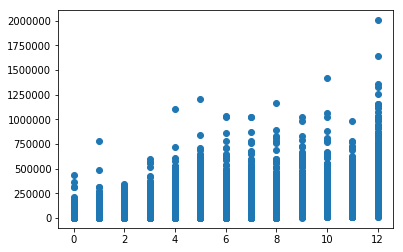

In [65]:
plt.scatter(df.Morning_Views,df.Summed_time)